#Hands-on Activity 9.2 Customized Visualizations using Seaborn

##Procedures:

- 9.4 Introduction to Seaborn
- 9.5 Formatting Plots
- 9.6 Customizing Visualizations

##Data Analysis:

Provide comments on output from the procedures.

##Supplementary Activity:

Using the CSV files provided and what we have learned so far in this module complete the following exercises:

1. Using seaborn, create a heatmap to visualize the correlation coefficients between earthquake magnitude and whether there was a tsunami with the magType of mb.
2. Create a box plot of Facebook volume traded and closing prices, and draw reference lines for the bounds of a Tukey fence with a multiplier of 1.5. The bounds will be at Q1 - 1.5 * IQR and Q3 + 1.5 * IQR. Be sure to use the quantile() method on the data to make this easier. (Pick whichever orientation you prefer for the plot, but make sure to use subplots.)
3. Fill in the area between the bounds in the plot from exercise #2.
4. Use axvspan() to shade a rectangle from '2018-07-25' to '2018-07-31', which marks the large decline in Facebook price on a line plot of the closing price.
5. Using the Facebook stock price data, annotate the following three events on a line plot of the closing price:
 - Disappointing user growth announced after close on July 25, 2018
 - Cambridge Analytica story breaks on March 19, 2018 (when it affected the market)
 - FTC launches investigation on March 20, 2018
6. Modify the reg_resid_plots() function to use a matplotlib colormap instead of cycling between two colors. Remember, for this use case, we should pick a qualitative colormap or make our own.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
fb = pd.read_csv(
 '/content/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
quakes = pd.read_csv('/content/earthquakes-1.csv')

<Axes: >

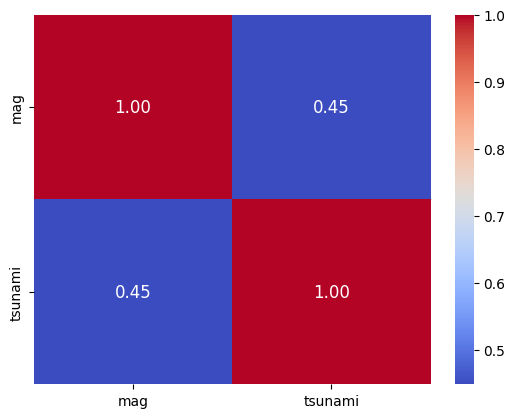

In [ ]:
subset_quakes = quakes[quakes['magType'] == 'mb'][['mag','tsunami']]
correlation = subset_quakes.corr()
sns.heatmap(
    correlation,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    annot_kws={"size": 12}
)

Text(0.5, 1.0, 'Box Plot of Facebook Closing Prices')

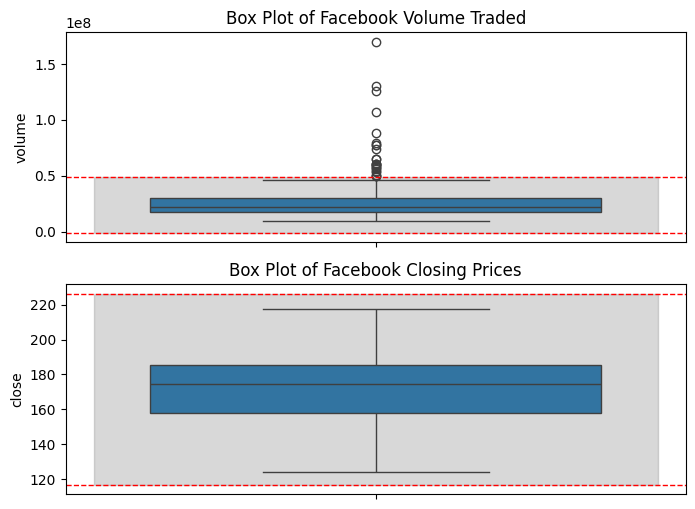

In [ ]:
Q1 = fb.quantile(0.25)
Q3 = fb.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(8, 6))

# Box plot for Volume
sns.boxplot(ax=axes[0], y=fb['volume'])
axes[0].axhline(y=lower_bound['volume'], color='r', linestyle='--', linewidth=1)
axes[0].axhline(y=upper_bound['volume'], color='r', linestyle='--', linewidth=1)
axes[0].fill_between([-0.5, 0.5], lower_bound['volume'], upper_bound['volume'], color='gray', alpha=0.3) #Fill the area between the bounds in the plot
axes[0].set_title('Box Plot of Facebook Volume Traded')

# Box plot for Closing Price
sns.boxplot(ax=axes[1], y=fb['close'])
axes[1].axhline(y=lower_bound['close'], color='r', linestyle='--', linewidth=1)
axes[1].axhline(y=upper_bound['close'], color='r', linestyle='--', linewidth=1)
axes[1].fill_between([-0.5, 0.5], lower_bound['close'], upper_bound['close'], color='gray', alpha=0.3) #Fill the area between the bounds in the plot
axes[1].set_title('Box Plot of Facebook Closing Prices')



Text(0, 0.5, 'Closing Price')

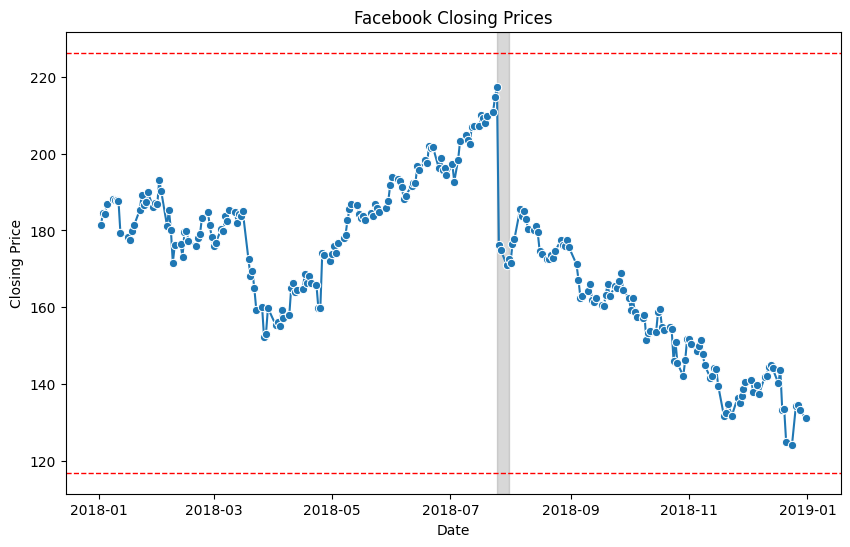

In [ ]:
Q1 = fb['close'].quantile(0.25)
Q3 = fb['close'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create subplots
fig, axes = plt.subplots(1, 1, figsize=(10, 6))

# Line plot for Closing Price
sns.lineplot(ax=axes, x='date', y='close', data=fb, marker='o')
axes.axhline(y=lower_bound, color='r', linestyle='--', linewidth=1)
axes.axhline(y=upper_bound, color='r', linestyle='--', linewidth=1)

# Shade rectangle for large decline
axes.axvspan(pd.Timestamp('2018-07-25'), pd.Timestamp('2018-07-31'), color='gray', alpha=0.3)

axes.set_title('Facebook Closing Prices')
axes.set_xlabel('Date')
axes.set_ylabel('Closing Price')

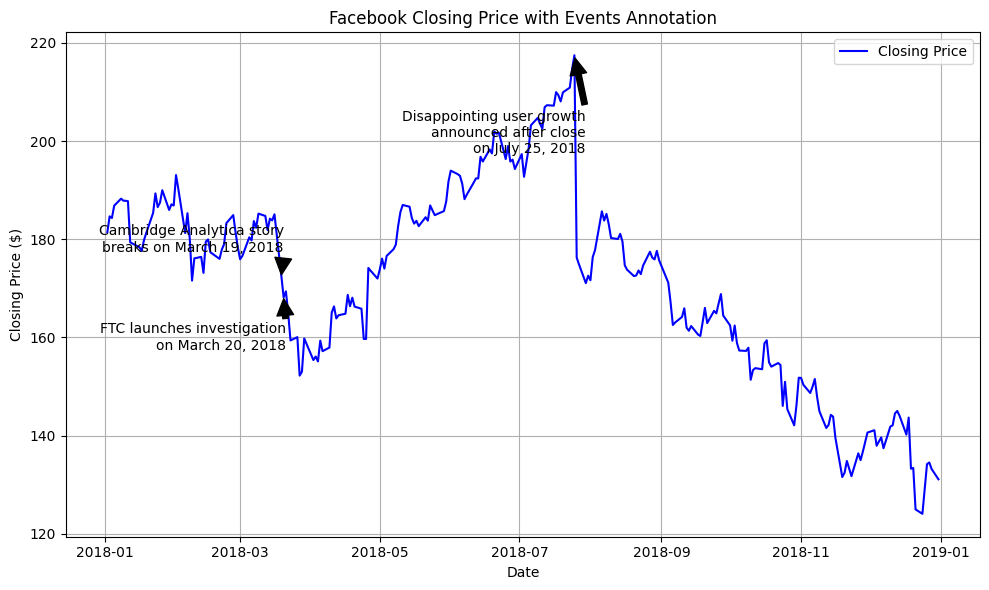

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(fb.index, fb['close'], label='Closing Price', color='blue')

# Annotation for disappointing user growth announced after close on July 25, 2018
plt.annotate('Disappointing user growth\nannounced after close\non July 25, 2018',
             xy=(pd.Timestamp('2018-07-25'), fb.loc['2018-07-25', 'close']),
             xytext=(pd.Timestamp('2018-07-30'), fb['close'].max() - 20),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10,
             horizontalalignment='right')

# Annotation for Cambridge Analytica story breaks on March 19, 2018
plt.annotate('Cambridge Analytica story\nbreaks on March 19, 2018',
             xy=(pd.Timestamp('2018-03-19'), fb.loc['2018-03-19', 'close']),
             xytext=(pd.Timestamp('2018-03-20'), fb['close'].max() - 40),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10,
             horizontalalignment='right')

# Annotation for FTC launches investigation on March 20, 2018
plt.annotate('FTC launches investigation\non March 20, 2018',
             xy=(pd.Timestamp('2018-03-20'), fb.loc['2018-03-20', 'close']),
             xytext=(pd.Timestamp('2018-03-21'), fb['close'].max() - 60),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10,
             horizontalalignment='right')

plt.title('Facebook Closing Price with Events Annotation')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def reg_resid_plots(data):
    """
    Using seaborn, plot the regression and residuals
    plots side-by-side for every permutation of 2 columns
    in the data.

    Parameters:
        - data: A pandas DataFrame

    Returns:
        A matplotlib Figure object.
    """
    num_cols = data.shape[1]
    permutation_count = num_cols * (num_cols - 1)

    fig, ax = plt.subplots(permutation_count, 2, figsize=(15, 8))

    # Define a qualitative colormap
    cmap = plt.get_cmap('tab10')

    for (x, y), axes, color in zip(
        itertools.permutations(data.columns, 2),
        ax,
        cmap(np.linspace(0, 1, permutation_count))  # Use colors from the colormap
    ):
        for subplot, func in zip(axes, (sns.regplot, sns.residplot)):
            func(x=x, y=y, data=data, ax=subplot, color=color)
    plt.close()
    return fig

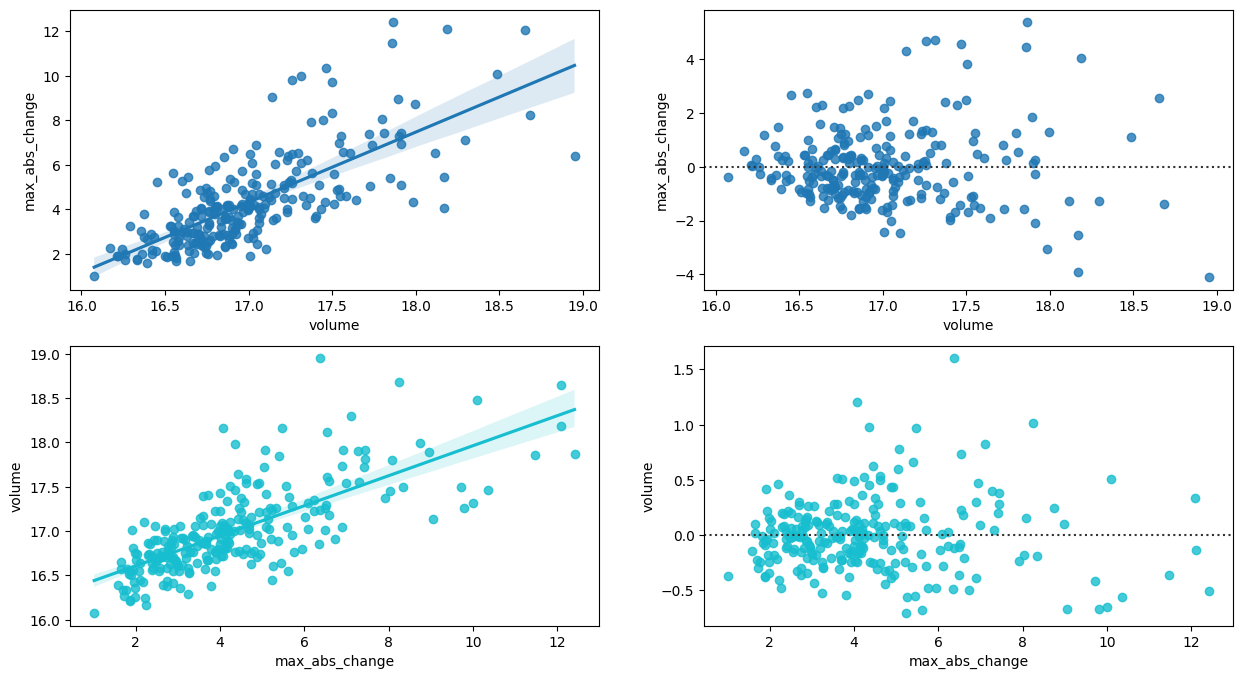

In [ ]:
fb_reg_data = fb.assign(
 volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low
).iloc[:,-2:]
reg_resid_plots(fb_reg_data)

##Summary/Conclusion:

During this hands-on activity, I was introduced to Seaborn, a powerful Python visualization tool. Through actual application, I learnt how to use Seaborn for data visualization tasks. In addition, I learned how to format plots and customize visualizations, all of which are necessary skills for generating clear and effective data visualizations. This assignment taught me how to successfully utilize Seaborn to investigate and share data insights using visually attractive plots and graphics.